
Top 5 Startups:
  startup_id      score
0       S006  83.865725
1       S077  79.586613
2       S045  74.889169
3       S043  74.308405
4       S097  74.172379

Bottom 5 Startups:
   startup_id      score
95       S079  30.624210
96       S088  30.273730
97       S052  29.256627
98       S084  28.078944
99       S055  23.586998


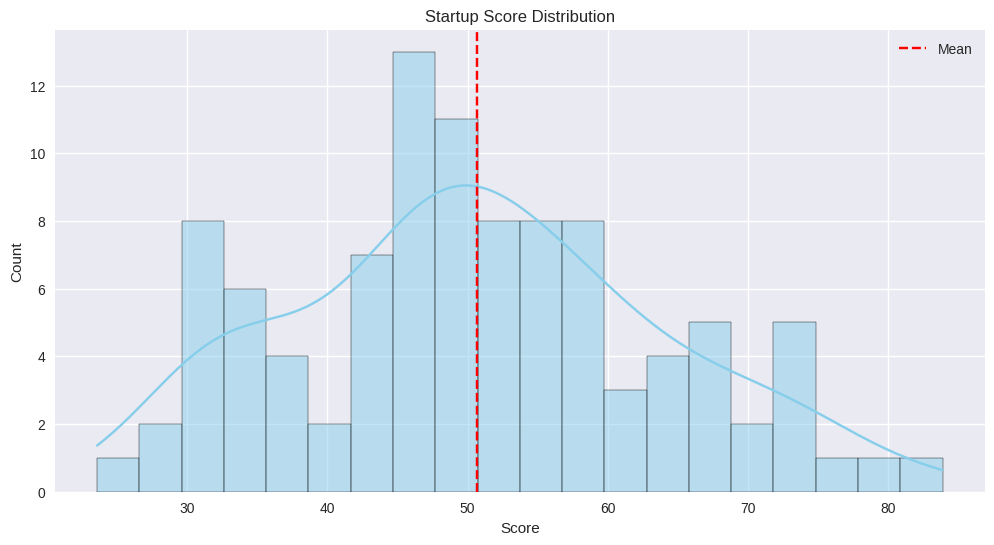

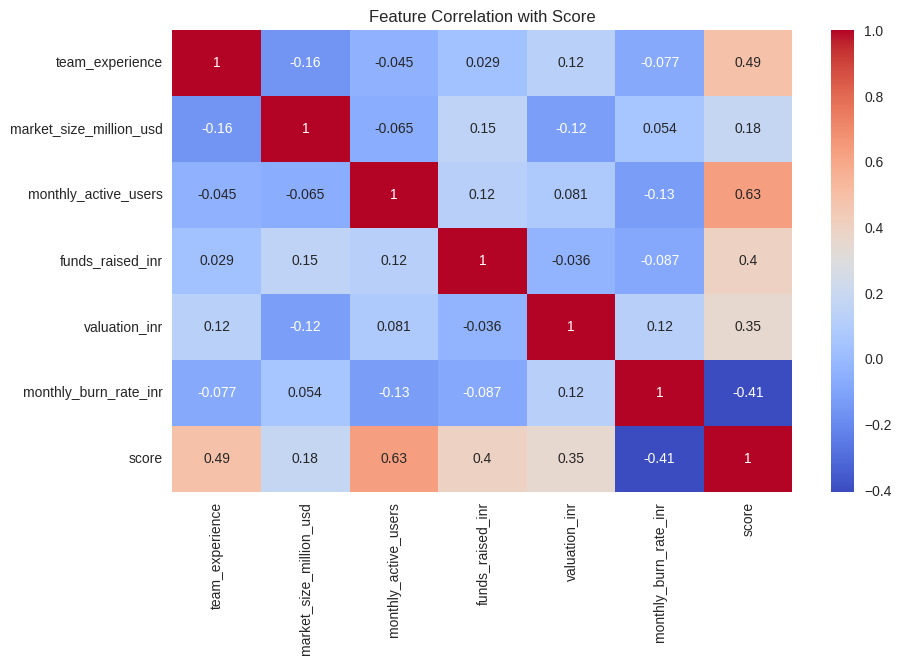

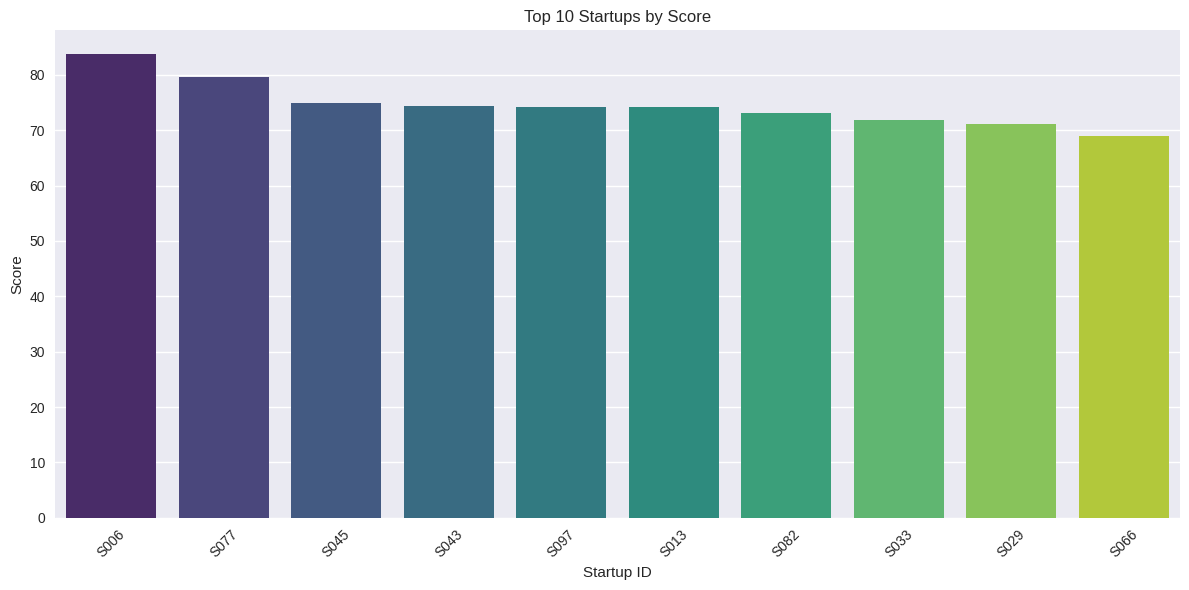

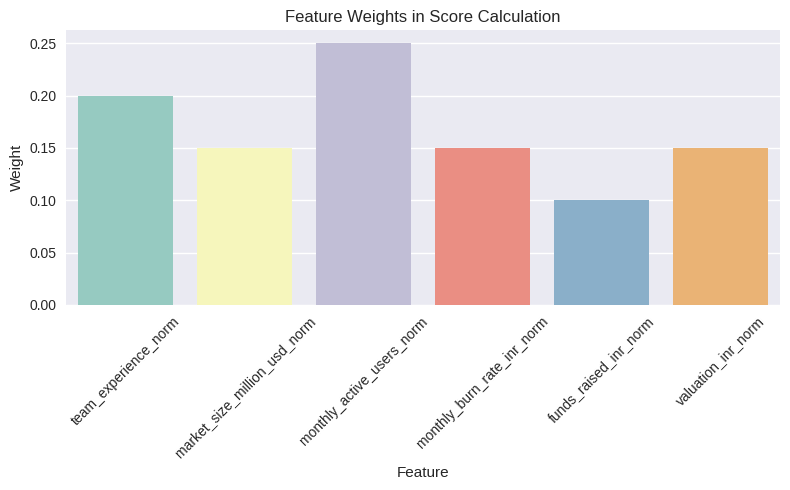


✅ Results saved to 'startup_scores.csv'


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

try:
    df = pd.read_csv('Startup_Scoring_Dataset.csv')
except FileNotFoundError:
    print("Dataset not found. Please ensure the CSV file is in the same directory.")
    exit()

positive = ['team_experience', 'market_size_million_usd', 'monthly_active_users', 'funds_raised_inr', 'valuation_inr']
negative = ['monthly_burn_rate_inr']
all_features = positive + negative

scaler = MinMaxScaler()
df_norm = df.copy()
for col in positive:
    df_norm[col + '_norm'] = scaler.fit_transform(df[[col]])

for col in negative:
    df_norm[col + '_norm'] = 1 - scaler.fit_transform(df[[col]])

weights = {
    'team_experience_norm': 0.20,
    'market_size_million_usd_norm': 0.15,
    'monthly_active_users_norm': 0.25,
    'monthly_burn_rate_inr_norm': 0.15,
    'funds_raised_inr_norm': 0.10,
    'valuation_inr_norm': 0.15
}

df_norm['score'] = sum(df_norm[feat] * w for feat, w in weights.items()) * 100
df_norm = df_norm.sort_values('score', ascending=False).reset_index(drop=True)
df_norm['rank'] = df_norm.index + 1

print("\nTop 5 Startups:")
print(df_norm[['startup_id', 'score']].head())

print("\nBottom 5 Startups:")
print(df_norm[['startup_id', 'score']].tail())

plt.figure(figsize=(12, 6))
sns.histplot(df_norm['score'], bins=20, kde=True, color='skyblue')
plt.axvline(df_norm['score'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Startup Score Distribution')
plt.xlabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
corr_features = all_features + ['score']
sns.heatmap(df_norm[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Score")
plt.show()

plt.figure(figsize=(12, 6))
top10 = df_norm.head(10)
sns.barplot(data=top10, x='startup_id', y='score', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Startups by Score')
plt.ylabel('Score')
plt.xlabel('Startup ID')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=list(weights.keys()), y=list(weights.values()), palette='Set3')
plt.xticks(rotation=45)
plt.title('Feature Weights in Score Calculation')
plt.ylabel('Weight')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()




df_norm[['rank', 'startup_id', 'score']].to_csv('startup_scores.csv', index=False)
print("\n✅ Results saved to 'startup_scores.csv'")
